TargetPixelFileCollection of 10 objects:
    0: TessTargetPixelFile(TICID: 100100827)
    1: TessTargetPixelFile(TICID: 100100827)
    2: TessTargetPixelFile(TICID: 100100827)
    3: TessTargetPixelFile(TICID: 100100827)
    4: TessTargetPixelFile(TICID: 100100827)
    5: TessTargetPixelFile(TICID: 100100827)
    6: TessTargetPixelFile(TICID: 100100827)
    7: TessTargetPixelFile(TICID: 100100827)
    8: TessTargetPixelFile(TICID: 100100827)
    9: TessTargetPixelFile(TICID: 100100827)


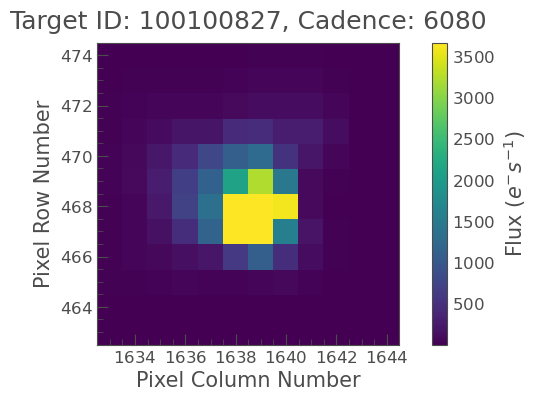

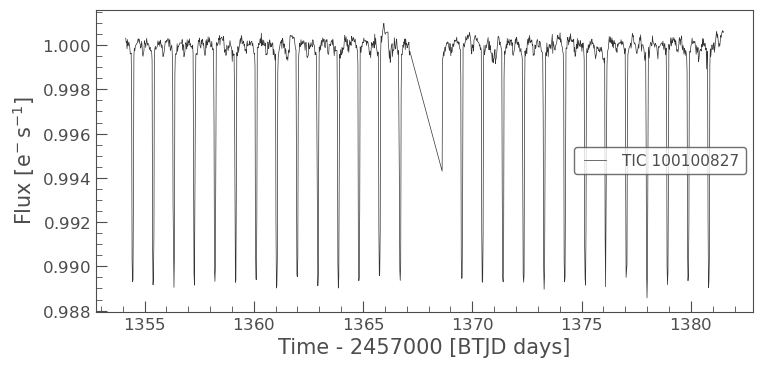

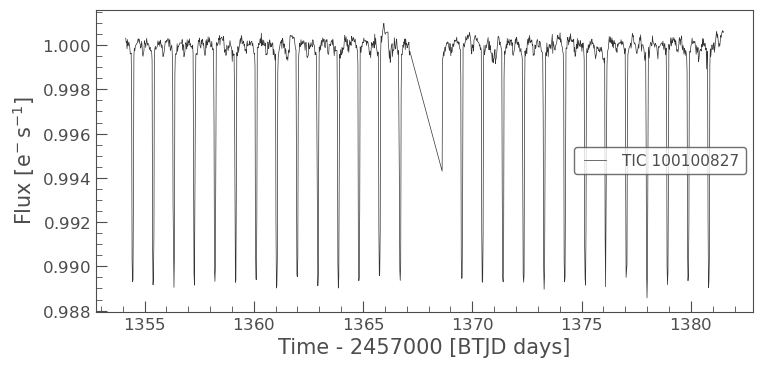

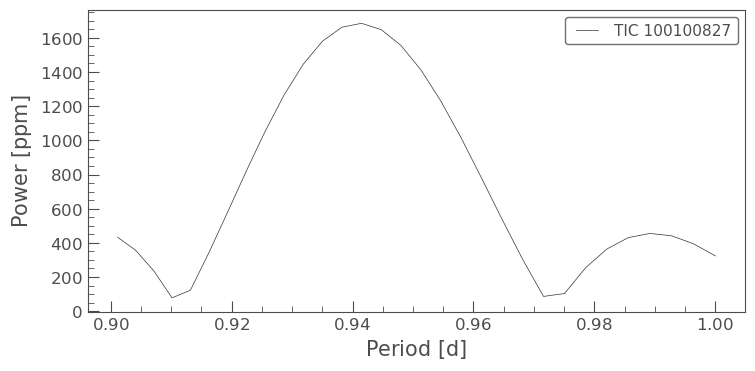

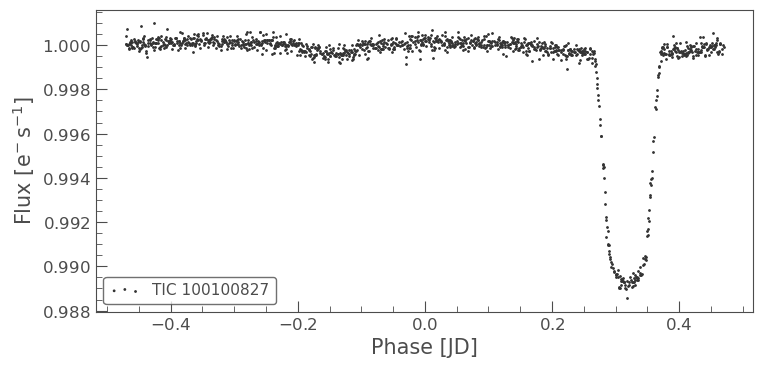

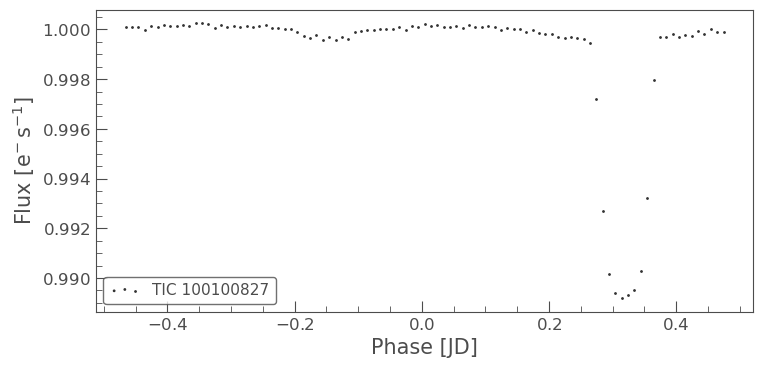

In [1]:
# This is a simple programusing the lightkurve package to read some TESS data on WASP-18b and to construct a light curve.

import lightkurve as lk
import matplotlib.pyplot as plt

search_result = lk.search_targetpixelfile('WASP-18', mission='TESS')

tpf = search_result.download_all(quality_bitmask='default')

print(tpf)

num_tpf = len(tpf)

i = 1
aperture_mask = tpf[i].create_threshold_mask(threshold=10)
lc = tpf[i].to_lightcurve(aperture_mask=aperture_mask).flatten(window_length=1001)

tpf[i].plot()
lc.plot()
lc1 = lc.remove_outliers(sigma=6)[0:9000]
lc1.plot()
pg1 = lc1.normalize(unit='ppm').to_periodogram(minimum_period=0.9, maximum_period=1,oversample_factor=10)
pg1.plot(view='period');
# We use the period for phase folding.  This value was found elsewhere but could be determined using more data
period = 0.94145455
lc1.fold(period=period).scatter();
binned_lc = lc1.fold(period=period).bin(time_bin_size=0.01)
binned_lc.scatter();
